In [14]:
# import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
pd.options.mode.chained_assignment = None

In [15]:
# read the dataset into df
df = pd.read_csv('fifa.csv')

In [16]:
# clean the data by deleting the columns not required for the project
del df["player_url"]
del df["sofifa_id"]
del df["dob"]
del df["height_cm"]
del df["weight_kg"]
del df["international_reputation"]
del df["body_type"]
del df["real_face"]
del df["team_jersey_number"]
del df["loaned_from"]
del df["joined"]
del df["contract_valid_until"]
del df["nation_jersey_number"]
del df["defending_marking"]
del df["ls"]
del df["rs"]
del df["lw"]
del df["lf"]
del df["st"]
del df["cf"]
del df["rf"]
del df["rw"]
del df["lam"]
del df["cam"]
del df["ram"]
del df["lm"]
del df["lcm"]
del df["cm"]
del df["rcm"]
del df["rm"]
del df["lwb"]
del df["ldm"]
del df["cdm"]
del df["rdm"]
del df["rwb"]
del df["lb"]
del df["lcb"]
del df["cb"]
del df["rcb"]
del df["long_name"]
del df["league_rank"]
del df["preferred_foot"]
del df["weak_foot"]
del df["skill_moves"]
del df["player_tags"]
del df["player_traits"]
del df["rb"]
del df["team_position"]
del df["nation_position"]
del df["league_name"]
del df["goalkeeping_handling"]
del df["goalkeeping_reflexes"]
del df["goalkeeping_positioning"]
del df["goalkeeping_diving"]
del df["goalkeeping_kicking"]

# print first five records of the dataset
df.head()

,short_name,age,nationality,club_name,overall,potential,value_eur,wage_eur,player_positions,work_rate,...,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle
0,L. Messi,33,Argentina,FC Barcelona,93,93,67500000,560000,"RW, ST, CF",Medium/Low,...,69,94,44,40,93,95,75,96,35,24
1,Cristiano Ronaldo,35,Portugal,Juventus,92,92,46000000,220000,"ST, LW",High/Low,...,78,93,63,29,95,82,84,95,32,24
2,J. Oblak,27,Slovenia,Atlético Madrid,91,93,75000000,125000,GK,Medium/Medium,...,78,12,34,19,11,65,11,68,12,18
3,R. Lewandowski,31,Poland,FC Bayern München,91,91,80000000,240000,ST,High/Medium,...,86,85,81,49,94,79,88,88,42,19
4,Neymar Jr,28,Brazil,Paris Saint-Germain,91,91,90000000,270000,"LW, CAM",High/Medium,...,50,84,51,36,87,90,92,93,30,29


In [12]:
# some EDA on the datasest
df.describe()

,age,overall,potential,value_eur,wage_eur,release_clause_eur,pace,shooting,passing,dribbling,...,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle
count,18944.000000,18944.000000,18944.000000,1.894400e+04,18944.000000,1.794900e+04,16861.000000,16861.000000,16861.000000,16861.000000,...,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000
mean,25.225823,65.677787,71.086729,2.224813e+06,8675.852513,4.296353e+06,67.668110,52.274954,57.139434,62.455430,...,64.742927,46.758763,55.488862,46.250000,50.255807,53.828231,48.050412,57.978674,47.581767,45.546505
std,4.697354,7.002278,6.109985,5.102486e+06,19654.774894,1.005968e+07,10.984862,13.991421,10.273655,10.048706,...,12.519775,19.305319,17.203045,20.738106,19.443738,13.724072,15.671721,12.118390,21.402461,20.953997
min,16.000000,47.000000,47.000000,0.000000e+00,0.000000,9.000000e+03,25.000000,16.000000,25.000000,25.000000,...,16.000000,4.000000,9.000000,3.000000,2.000000,9.000000,6.000000,12.000000,5.000000,4.000000
25%,21.000000,61.000000,67.000000,3.000000e+05,1000.000000,5.250000e+05,62.000000,42.000000,50.000000,57.000000,...,57.000000,32.000000,44.000000,25.000000,40.000000,45.000000,38.750000,50.000000,27.000000,24.000000
50%,25.000000,66.000000,71.000000,6.500000e+05,3000.000000,1.100000e+06,68.000000,54.000000,58.000000,64.000000,...,66.000000,51.000000,58.000000,52.000000,55.000000,55.000000,49.000000,59.000000,55.000000,52.000000
75%,29.000000,70.000000,75.000000,1.800000e+06,7000.000000,3.200000e+06,75.000000,63.000000,64.000000,69.000000,...,74.000000,62.000000,68.000000,64.000000,64.000000,64.000000,60.000000,66.000000,65.000000,63.000000
max,53.000000,93.000000,95.000000,1.055000e+08,560000.000000,2.031000e+08,96.000000,93.000000,93.000000,95.000000,...,97.000000,94.000000,96.000000,91.000000,95.000000,95.000000,92.000000,96.000000,93.000000,90.000000


In [17]:
# are there any relevant insights in the top 50 rated players in the FIFA dataset
df[:50].describe()

,age,overall,potential,value_eur,wage_eur,release_clause_eur,pace,shooting,passing,dribbling,...,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle
count,50.000000,50.000000,50.000000,5.000000e+01,50.000000,5.000000e+01,40.000000,40.000000,40.000000,40.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000
mean,28.800000,88.300000,89.240000,5.500000e+07,213420.000000,1.051340e+08,78.000000,76.475000,79.600000,83.225000,...,73.340000,63.440000,63.740000,51.820000,66.500000,76.080000,63.04000,83.260000,50.100000,45.820000
std,3.619674,1.631951,2.065855,1.923777e+07,88528.812328,3.750764e+07,11.156233,14.500199,8.104446,8.507877,...,10.959313,28.246842,20.470796,25.542833,30.520819,14.670309,23.99061,8.696258,27.957147,27.321734
min,20.000000,86.000000,87.000000,1.550000e+07,82000.000000,2.560000e+07,42.000000,28.000000,55.000000,60.000000,...,43.000000,10.000000,23.000000,11.000000,10.000000,30.000000,11.00000,65.000000,10.000000,8.000000
25%,26.250000,87.000000,87.000000,4.612500e+07,155000.000000,8.312500e+07,72.500000,69.750000,76.750000,80.000000,...,65.500000,50.000000,45.000000,31.250000,48.250000,70.000000,44.75000,82.250000,29.000000,22.500000
50%,28.000000,88.000000,89.000000,5.400000e+07,197500.000000,1.063500e+08,78.000000,81.000000,80.500000,85.000000,...,74.000000,78.000000,67.000000,42.000000,80.500000,82.000000,70.50000,85.000000,44.000000,39.000000
75%,31.750000,89.000000,90.750000,6.900000e+07,260000.000000,1.301000e+08,85.000000,86.000000,84.250000,90.000000,...,80.000000,84.000000,81.000000,81.250000,89.750000,85.750000,83.75000,88.750000,81.000000,77.000000
max,35.000000,93.000000,95.000000,1.055000e+08,560000.000000,2.031000e+08,96.000000,93.000000,93.000000,95.000000,...,94.000000,94.000000,91.000000,91.000000,95.000000,95.000000,92.00000,96.000000,93.000000,90.000000


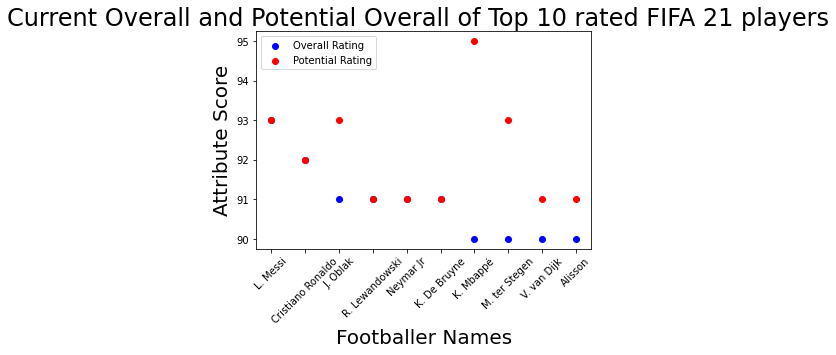

In [18]:
# visualize the top 10 rated players

top_10 = {'Name': df['short_name'][0:10], 'Overall': df['overall'][0:10], 'Potential': df['potential'][0:10]}

plt.figtext(.5,.9,"Current Overall and Potential Overall of Top 10 rated FIFA 21 players", fontsize = 24, ha='center')
plt.scatter(top_10['Name'], top_10['Overall'], color = 'blue', label = 'Overall Rating')
plt.scatter(top_10['Name'], top_10['Potential'], color = 'red', label = 'Potential Rating')
plt.xlabel('Footballer Names', fontsize = 20)
plt.xticks(rotation = 45)
plt.ylabel('Attribute Score', fontsize = 20)
plt.legend()
plt.show()

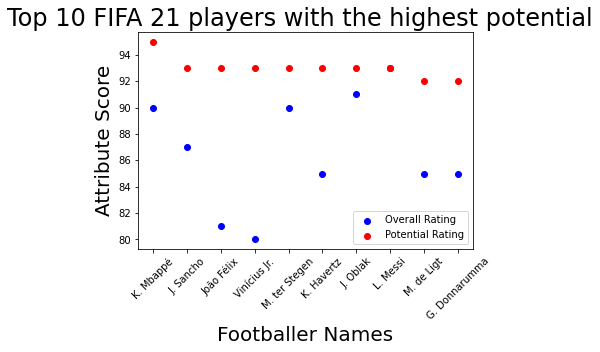

In [20]:
# visualize the top 10 players by their potential

df.sort_values(by=['potential'], inplace=True, ascending=False)
df = df.reset_index(drop = True)
top_10_potential = {'Name': df['short_name'][0:10], 'Overall': df['overall'][0:10], 'Potential': df['potential'][0:10]}
plt.figtext(.5,.9,"Top 10 FIFA 21 players with the highest potential", fontsize = 24, ha='center')
plt.scatter(top_10_potential['Name'], top_10_potential['Overall'], color = 'blue', label = 'Overall Rating')
plt.scatter(top_10_potential['Name'], top_10_potential['Potential'], color = 'red', label = 'Potential Rating')
plt.xlabel('Footballer Names', fontsize = 20)
plt.xticks(rotation = 45)
plt.ylabel('Attribute Score', fontsize = 20)
plt.legend()
plt.show()


In [ ]:
# LIONEL MESSI AND CRISTIANO RONALDO HAVE THE SAME POTENTIAL AS THEIR CURRENT OVERALL